In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#kaggle house price dataset link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#checking missing value or not

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<ipython-input-12-8b5f7a77faad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

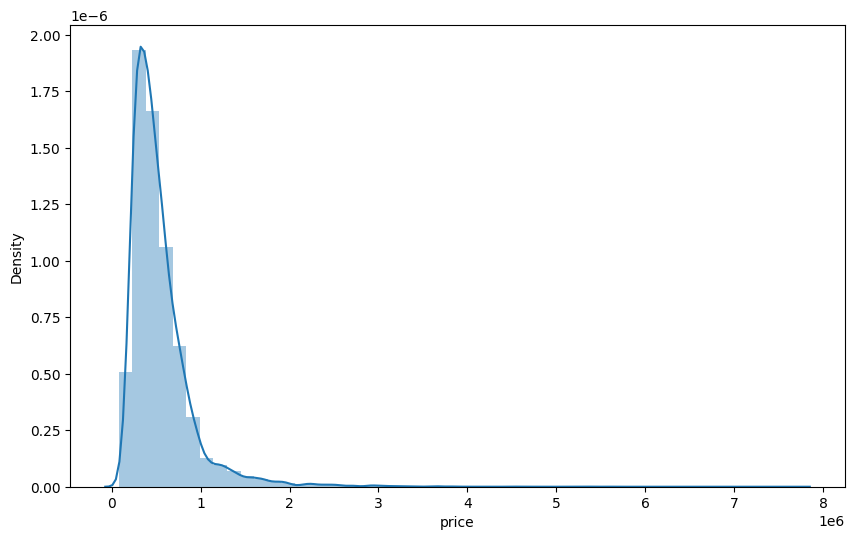

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<Axes: ylabel='count'>

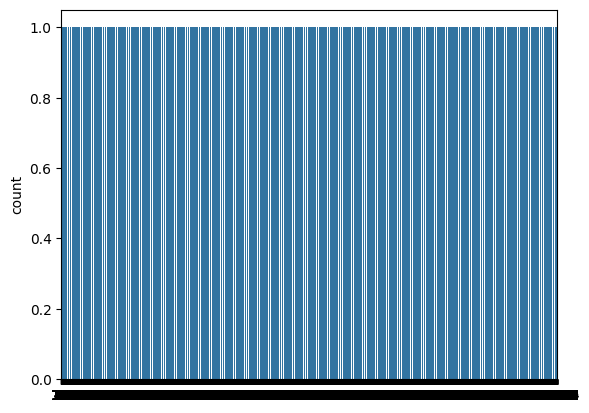

In [13]:
sns.countplot(df['bedrooms'])

In [18]:
df.drop(columns=['date'],axis=1).corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

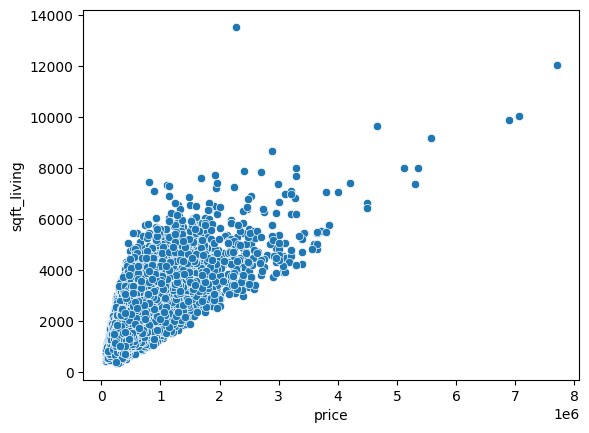

In [19]:
sns.scatterplot(x='price', y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

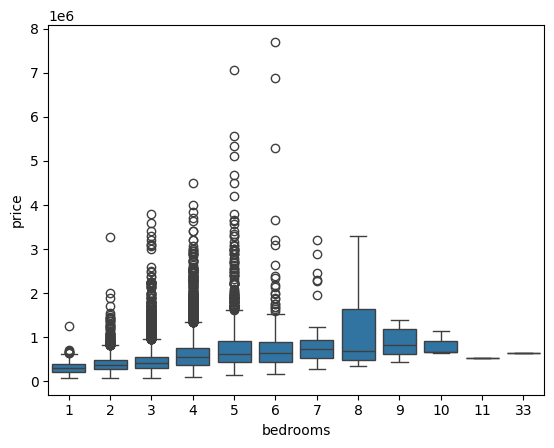

In [20]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [14]:
df.corr()['price'].sort_values()

ValueError: could not convert string to float: '10/13/2014'

<Axes: xlabel='long', ylabel='lat'>

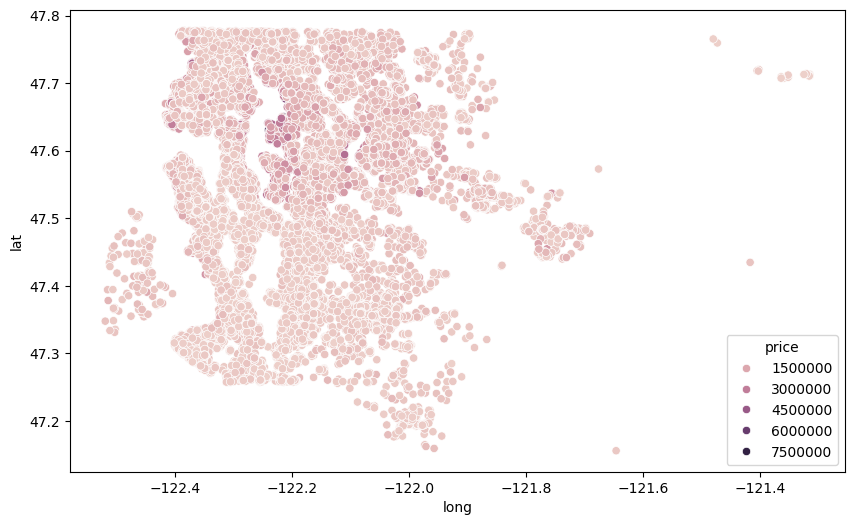

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data =df, hue='price')

In [22]:
non_top_1_percent = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

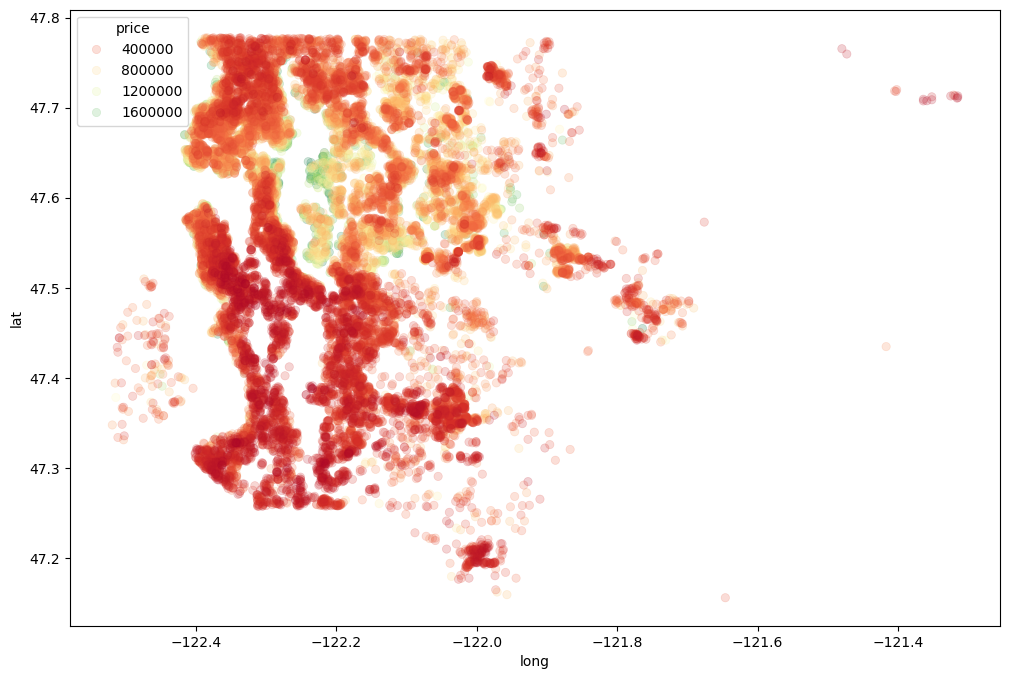

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_percent,edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

In [4]:
df = df.drop('id',axis=1)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [7]:
def  year_extraction(date):
  return date.year

In [10]:
df['month'] = df['date'].apply(lambda date :date.month)

In [11]:
df['year'] = df['date'].apply(lambda date: date.year)

<Axes: xlabel='month', ylabel='price'>

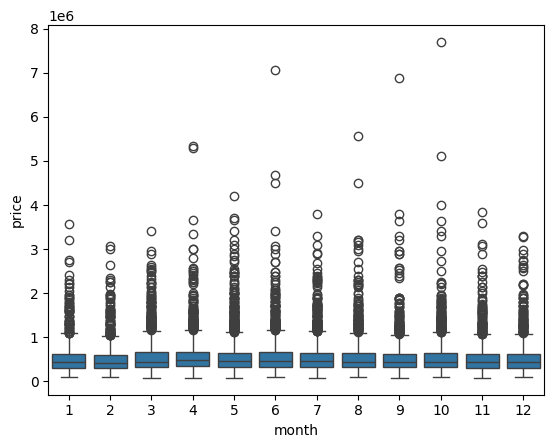

In [12]:
sns.boxplot(x='month',y='price',data = df)

<Axes: xlabel='month'>

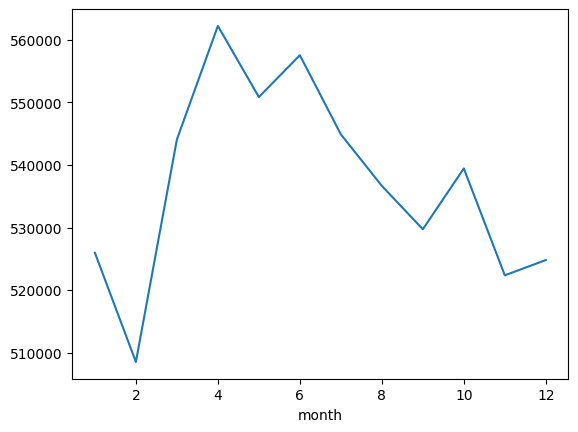

In [13]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

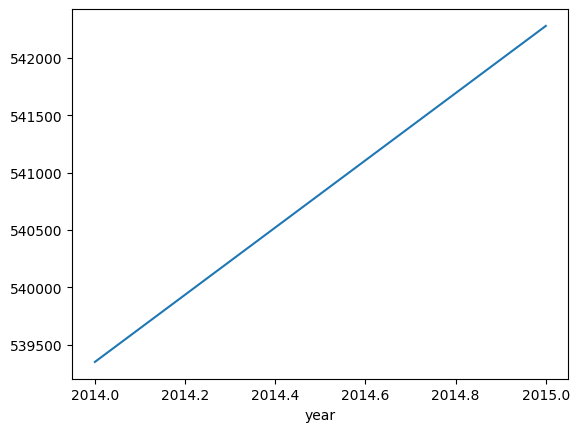

In [14]:
df.groupby('year').mean()['price'].plot()

In [15]:
df = df.drop('date',axis=1)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [18]:
#df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [19]:
df = df.drop('zipcode',axis=1)

In [22]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [23]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [24]:
X = df.drop('price',axis=1).values
y= df['price'].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state =101)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

In [32]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [33]:
model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), batch_size =128, epochs=400 )

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 430234959872.0000 - val_loss: 418885992448.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428741492736.0000 - val_loss: 413732601856.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 408725782528.0000 - val_loss: 368823402496.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 316694429696.0000 - val_loss: 227575791616.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 162018738176.0000 - val_loss: 105416851456.0000
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: 100232445952.0000 - val_loss: 94188044288.0000
Epoch 7/400
119/119 [==============================] - 1s 4ms/step - loss: 96520978432.0000 - val_loss: 92649299968.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 94836817920.0000 - val_loss: 91055046656.0000
Epoch 9/400
119/119 [

In [34]:
losses = pd.DataFrame(model.history.history)

<Axes: >

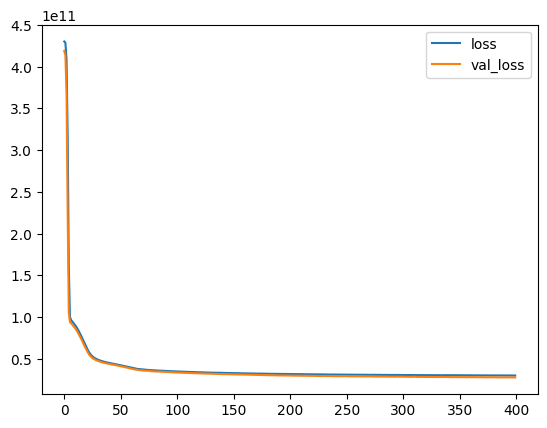

In [35]:
losses.plot()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [37]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [38]:
mean_squared_error(y_test,predictions)

27590129774.508327

In [39]:
np.sqrt(mean_squared_error(y_test,predictions))

166102.76871415577

In [40]:
exd_var = explained_variance_score(y_test,predictions)

In [41]:
exd_var

0.7920393136962234